<a href="https://colab.research.google.com/github/FinalProjectEEE/FinalProject/blob/main/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd '/content/drive/My Drive/FinalProject/Neon_Color_Images/'
%ls
import os
path = os.getcwd()
print('path: ' + path)

Mounted at /content/drive/
/content/drive/My Drive/FinalProject/Neon_Color_Images
'NeonBlue sparse.png'           NeonColorLightBlue.png   NeonContour.png    triangle.png
 NeonColorBlue.png              NeonColor.png            net.png
 NeonColorGreen_Diffusion.png   NeonColorRedDense.png    OrangeSquare.png
 NeonColorGreen.png             NeonColorRedSparse.png   PinkSquare.png
path: /content/drive/My Drive/FinalProject/Neon_Color_Images


In [ ]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt
from skimage import transform, io, util, img_as_float, img_as_ubyte
from skimage.transform import rescale
from skimage.color import rgb2gray
from skimage import restoration
import scipy.signal
from scipy.signal import medfilt2d
import cv2
from skimage.util import random_noise
import matplotlib.ticker as ticker
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
from google.colab.patches import cv2_imshow
from skimage import exposure
from skimage.filters import rank
from skimage.filters.rank import autolevel_percentile
from collections import Counter
from scipy.ndimage import rotate
from scipy.signal import convolve2d
from PIL import Image
import PIL

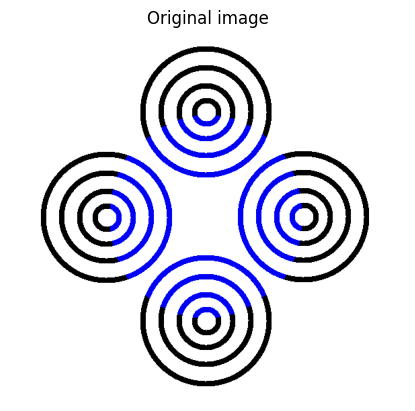

In [ ]:
# Upload Image

bgr_image = cv2.imread('NeonColorBlue.png')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image, cmap='gray')
plt.axis('off')
plt.title('Original image')
plt.show()

height, width = rgb_image.shape[:2]
for i in range(height):
  for j in range(width):
    if not np.array_equal(rgb_image[i, j], [255, 255, 255]) and not np.array_equal(rgb_image[i, j], [0, 0, 0]):
      y = i
      x = j
      break

y_chrom = y
x_chrom = x

y_background = 0
x_background = 0

In [ ]:
R_value = rgb_image[y_chrom, x_chrom][0]
G_value = rgb_image[y_chrom, x_chrom][1]
B_value = rgb_image[y_chrom, x_chrom][2]

red_channel, green_channel, blue_channel = cv2.split(rgb_image)
R_gray_value = red_channel[y_chrom, x_chrom]
G_gray_value = green_channel[y_chrom, x_chrom]
B_gray_value = blue_channel[y_chrom, x_chrom]

channels_array = [R_value, G_value, B_value]

dominant_channel = np.argmax(channels_array)

if dominant_channel == 0:
  relevant_channel = red_channel
if dominant_channel == 1:
  relevant_channel = green_channel
if dominant_channel == 2:
  relevant_channel = blue_channel

<ipython-input-5-5fd522d368fa>:5: RuntimeWarning: invalid value encountered in scalar divide
  a_R = (255*R_gray_value - 0.5*R_gray_value*R_gray_value)/(255*R_gray_value*R_gray_value - 255*255*R_gray_value)
<ipython-input-5-5fd522d368fa>:6: RuntimeWarning: invalid value encountered in scalar divide
  a_G = (255*G_gray_value - 0.5*G_gray_value*G_gray_value)/(255*G_gray_value*G_gray_value - 255*255*G_gray_value)
<ipython-input-5-5fd522d368fa>:9: RuntimeWarning: invalid value encountered in scalar divide
  b_R = (-255*255*R_gray_value + 0.5*R_gray_value*R_gray_value*R_gray_value)/(255*R_gray_value*R_gray_value - 255*255*R_gray_value)
<ipython-input-5-5fd522d368fa>:10: RuntimeWarning: invalid value encountered in scalar divide
  b_G = (-255*255*G_gray_value + 0.5*G_gray_value*G_gray_value*G_gray_value)/(255*G_gray_value*G_gray_value - 255*255*G_gray_value)


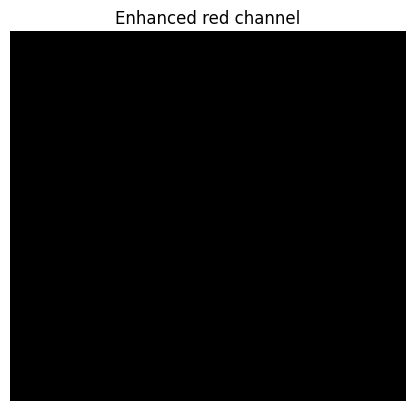

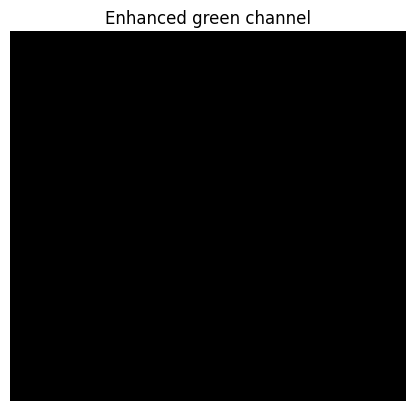

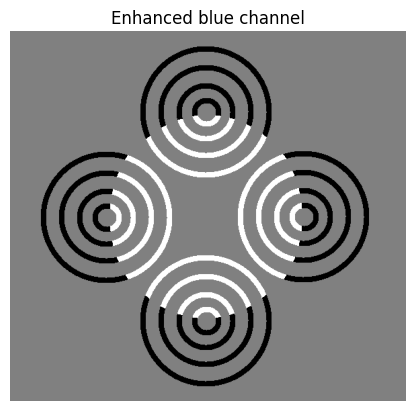

In [ ]:
# Enhance color channel

# Perform a contrast transformation:

a_R = (255*R_gray_value - 0.5*R_gray_value*R_gray_value)/(255*R_gray_value*R_gray_value - 255*255*R_gray_value)
a_G = (255*G_gray_value - 0.5*G_gray_value*G_gray_value)/(255*G_gray_value*G_gray_value - 255*255*G_gray_value)
a_B = (255*B_gray_value - 0.5*B_gray_value*B_gray_value)/(255*B_gray_value*B_gray_value - 255*255*B_gray_value)

b_R = (-255*255*R_gray_value + 0.5*R_gray_value*R_gray_value*R_gray_value)/(255*R_gray_value*R_gray_value - 255*255*R_gray_value)
b_G = (-255*255*G_gray_value + 0.5*G_gray_value*G_gray_value*G_gray_value)/(255*G_gray_value*G_gray_value - 255*255*G_gray_value)
b_B = (-255*255*B_gray_value + 0.5*B_gray_value*B_gray_value*B_gray_value)/(255*B_gray_value*B_gray_value - 255*255*B_gray_value)

I_LUM = 0.299*red_channel + 0.587*green_channel + 0.114*blue_channel
k = 0.5

if R_gray_value == 255:
  red_enhanced = red_channel - k*I_LUM
if R_gray_value != 255:
  red_enhanced = a_R*red_channel*red_channel + b_R*red_channel
if R_gray_value == 0:
  red_enhanced = 0*red_channel

if G_gray_value == 255:
  green_enhanced = green_channel - k*I_LUM
if G_gray_value != 255:
  green_enhanced = a_G*green_channel*green_channel + b_G*green_channel
if G_gray_value == 0:
  green_enhanced = 0*green_channel

if B_gray_value == 255:
  blue_enhanced = blue_channel - k*I_LUM
if B_gray_value != 255:
  blue_enhanced = a_B*blue_channel*blue_channel + b_B*blue_channel
if B_gray_value == 0:
  blue_enhanced = 0*blue_channel

plt.imshow(red_enhanced, cmap='gray')
plt.title('Enhanced red channel')
plt.axis('off')
plt.show()
plt.imshow(green_enhanced, cmap='gray')
plt.title('Enhanced green channel')
plt.axis('off')
plt.show()
plt.imshow(blue_enhanced, cmap='gray')
plt.title('Enhanced blue channel')
plt.axis('off')
plt.show()

In [ ]:
# Defining approximated Gabor filters

G_odd_x = np.array([[-1,1]])
G_odd_y = np.array([[-1],[1]])

In [ ]:
# Perform convolution with Gabor filters

def ConvolutionWithGabor(color_enhanced):
  I_Gabor_x = np.abs(scipy.signal.convolve2d(color_enhanced, G_odd_x, mode='same'))
  I_Gabor_y = np.abs(scipy.signal.convolve2d(color_enhanced, G_odd_y, mode='same'))
  return I_Gabor_x, I_Gabor_y

In [ ]:
# Apply thershold

def ApplyThreshold(I_Gabor_x, I_Gabor_y, threshold):
  max_val_x = np.max(I_Gabor_x)
  height, width = I_Gabor_x.shape
  for i in range(height):
    for j in range(width):
      if I_Gabor_x[i, j] <= threshold*max_val_x:
        I_Gabor_x[i, j] = 0
  I_Gabor_Th_x = I_Gabor_x

  max_val_y = np.max(I_Gabor_y)
  height, width = I_Gabor_y.shape
  for i in range(height):
    for j in range(width):
      if I_Gabor_y[i, j] <= threshold*max_val_y:
        I_Gabor_y[i, j] = 0
  I_Gabor_Th_y = I_Gabor_y

  return I_Gabor_Th_x, I_Gabor_Th_y, max_val_y

In [ ]:
# Combine direction x with direction y

def CombineThresholdEdges(I_Gabor_Th_x, I_Gabor_Th_y):
  I_Edges = I_Gabor_Th_x + I_Gabor_Th_y
  return I_Edges

In [ ]:
# Apply additional threshold

def ApplyAdditionalThreshold(I_Edges, max_val_y):
  max_val = np.max(I_Edges)
  min_val = np.min(I_Edges)
  height, width = I_Gabor_y.shape
  for i in range(height):
    for j in range(width):
      if I_Edges[i, j] <= 0.8*max_val_y:
        I_Edges[i, j] = 0
      else:
        I_Edges[i, j] = max_val

  return I_Edges

In [ ]:
# Finding the orientations of each edge

def FindOrientations(I_Edges):

  def compute_angles(image):
      #Compute the angle of each white pixel relative to the center of the image:
      height, width = image.shape
      y, x = np.nonzero(image)  # Find white pixel coordinates

      center_x, center_y = width // 2, height // 2  # Center of the image

      angles = np.arctan2(y - center_y, x - center_x) % (2 * np.pi)  # Compute angles

      return np.array(list(zip(y, x))), angles

  def group_angles(angles, pixels, threshold=0.05):

      sorted_indices = np.argsort(angles)
      sorted_angles = angles[sorted_indices]
      sorted_pixels = np.array(pixels)[sorted_indices]

      # Find gaps between angles to determine group boundaries:
      gaps = np.diff(sorted_angles, prepend=sorted_angles[-1] - 2 * np.pi)
      groups = np.cumsum(gaps > threshold)

      return sorted_pixels, sorted_angles, groups

  def line_angle_and_pixel(pixels, angles, groups):
      # Compute the line angle and midpoint pixel for each line group:
      unique_groups = np.unique(groups)
      results = []

      for group in unique_groups:
          group_indices = np.where(groups == group)[0]
          group_pixels = pixels[group_indices]
          group_angles = angles[group_indices]

          # Get edge angles and their corresponding pixels:
          min_angle_idx = np.argmin(group_angles)
          max_angle_idx = np.argmax(group_angles)

          pixel1 = group_pixels[min_angle_idx]
          pixel2 = group_pixels[max_angle_idx]

          # Compute line angle:
          dx = pixel2[1] - pixel1[1]
          dy = pixel2[0] - pixel1[0]
          line_angle = np.arctan2(dy, dx) % (2 * np.pi)

          # Compute midpoint pixel:
          midpoint_pixel = tuple(np.round((np.array(pixel1) + np.array(pixel2)) / 2).astype(int))

          results.append((midpoint_pixel, line_angle))

      return results

  def detect_lines(image):
      # Detect lines in the image and return their representative pixels and angles:

      pixels, angles = compute_angles(image)  # Compute angles

      pixels, angles, groups = group_angles(angles, pixels)  # Group angles

      result = line_angle_and_pixel(pixels, angles, groups)  # Compute line angles and midpoints

      return result

  result = detect_lines(I_Edges)
  return result

In [ ]:
# Creating the image after applying additive signal

def AdditiveSignal(I_Edges, result, a, b):

  def generate_oriented_gaussian(size, x_cen, y_cen, a, b, angle):
      # Generate an oriented 2D Gaussian function centered at (x_cen, y_cen):
      x, y = np.meshgrid(np.arange(size[1]), np.arange(size[0]))  # x = columns, y = rows

      x -= x_cen
      y -= y_cen

      cos_angle = np.cos(angle)
      sin_angle = np.sin(angle)
      x_rot = cos_angle * x + sin_angle * y
      y_rot = -sin_angle * x + cos_angle * y

      gaussian = np.exp(-0.5 * (x_rot**2 / a**2 + y_rot**2 / b**2))
      return gaussian

  def add_oriented_gaussians(image, result, a, b):
      # Add oriented 2D Gaussians to the image at specified pixels:
      height, width = image.shape
      output_image = np.zeros((height, width), dtype=np.float64)

      for (row, col), angle in result:
          # Generate Gaussian centered at (col, row) with the given orientation:
          gaussian = generate_oriented_gaussian((height, width), col, row, a, b, angle)

          # Multiply Gaussian by the grayscale value of the pixel:
          max_val = np.max(I_Edges)
          gaussian *= 0.35*max_val

          # Add the Gaussian image to the output image:
          output_image += gaussian

      return output_image

  # Add oriented Gaussians to the image:
  final_image = add_oriented_gaussians(I_Edges, result, a, b)
  facilitated_image = final_image + I_Edges

  max_fac = np.max(facilitated_image)
  height, width = facilitated_image.shape
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      if facilitated_image[i, j] <= 0.06*max_fac:
        facilitated_image[i, j] = 0

  return facilitated_image

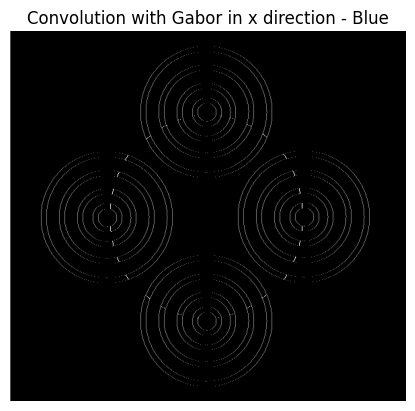

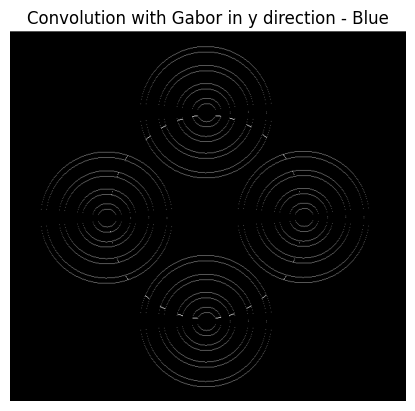

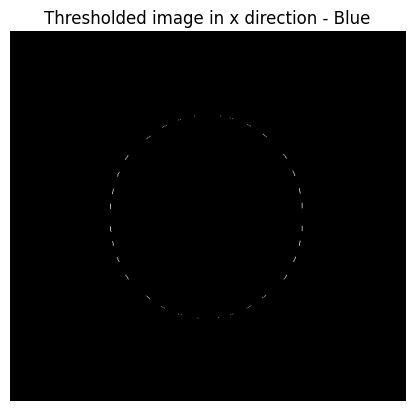

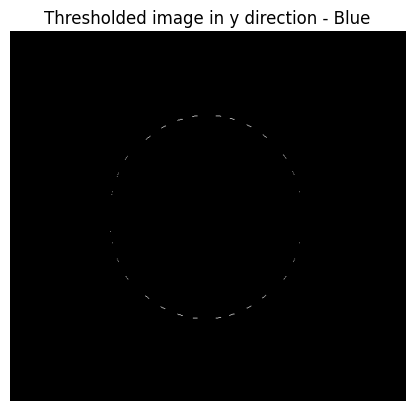

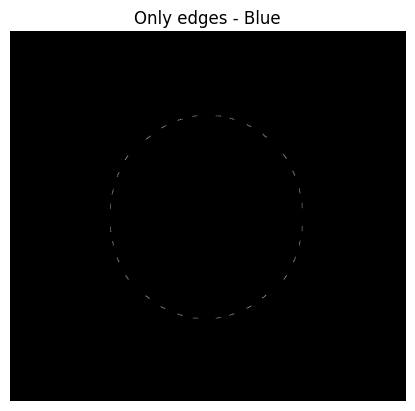

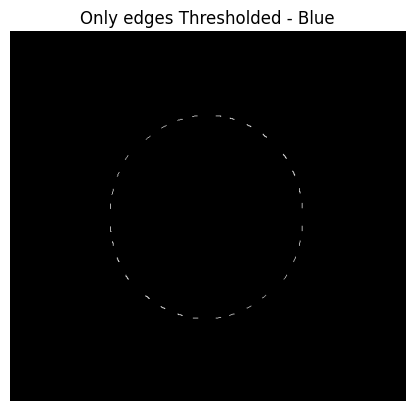

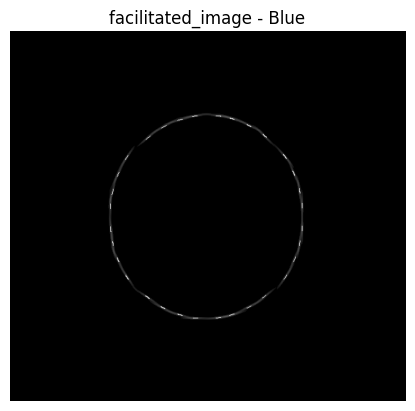

In [ ]:
# for red channel

if R_value != 0:

  I_Gabor_x, I_Gabor_y = ConvolutionWithGabor(red_enhanced)
  plt.imshow(I_Gabor_x, cmap='gray')
  plt.title('Convolution with Gabor in x direction - Red')
  plt.axis('off')
  plt.show()
  plt.imshow(I_Gabor_y, cmap='gray')
  plt.title('Convolution with Gabor in y direction - Red')
  plt.axis('off')
  plt.show()

  I_Gabor_Th_x, I_Gabor_Th_y, max_val_y = ApplyThreshold(I_Gabor_x, I_Gabor_y, 0.9)
  plt.imshow(I_Gabor_Th_x, cmap='gray')
  plt.title('Thresholded image in x direction - Red')
  plt.axis('off')
  plt.show()
  plt.imshow(I_Gabor_Th_y, cmap='gray')
  plt.title('Thresholded image in y direction - Red')
  plt.axis('off')
  plt.show()

  I_Edges = CombineThresholdEdges(I_Gabor_Th_x, I_Gabor_Th_y)
  plt.imshow(I_Edges, cmap='gray')
  plt.title('Only edges - Red')
  plt.axis('off')
  plt.show()

  I_Edges = ApplyAdditionalThreshold(I_Edges, max_val_y)
  plt.imshow(I_Edges, cmap='gray')
  plt.title('Only edges Thresholded - Red')
  plt.axis('off')
  plt.show()

  result = FindOrientations(I_Edges)

  a = 13
  b = 1.2
  facilitated_image_red = AdditiveSignal(I_Edges, result, a, b)
  plt.imshow(facilitated_image_red, cmap='gray')
  plt.title('facilitated_image - Red')
  plt.axis('off')
  plt.show()

else:
  height, width = red_channel.shape
  facilitated_image_red = np.zeros((height, width))

# for green channel

if G_value != 0:

  I_Gabor_x, I_Gabor_y = ConvolutionWithGabor(green_enhanced)
  plt.imshow(I_Gabor_x, cmap='gray')
  plt.title('Convolution with Gabor in x direction - Green')
  plt.axis('off')
  plt.show()
  plt.imshow(I_Gabor_y, cmap='gray')
  plt.title('Convolution with Gabor in y direction - Green')
  plt.axis('off')
  plt.show()

  I_Gabor_Th_x, I_Gabor_Th_y, max_val_y = ApplyThreshold(I_Gabor_x, I_Gabor_y, 0.8)
  plt.imshow(I_Gabor_Th_x, cmap='gray')
  plt.title('Thresholded image in x direction - Green')
  plt.axis('off')
  plt.show()
  plt.imshow(I_Gabor_Th_y, cmap='gray')
  plt.title('Thresholded image in y direction - Green')
  plt.axis('off')
  plt.show()

  I_Edges = CombineThresholdEdges(I_Gabor_Th_x, I_Gabor_Th_y)
  plt.imshow(I_Edges, cmap='gray')
  plt.title('Only edges - Green')
  plt.axis('off')
  plt.show()

  I_Edges = ApplyAdditionalThreshold(I_Edges, max_val_y)
  plt.imshow(I_Edges, cmap='gray')
  plt.title('Only edges Thresholded - Green')
  plt.axis('off')
  plt.show()

  result = FindOrientations(I_Edges)

  a = 13
  b = 1.2
  facilitated_image_green = AdditiveSignal(I_Edges, result, a, b)
  plt.imshow(facilitated_image_green, cmap='gray')
  plt.title('facilitated_image - Green')
  plt.axis('off')
  plt.show()

else:
  height, width = green_channel.shape
  facilitated_image_green = np.zeros((height, width))

# for blue channel

if B_value != 0:

  I_Gabor_x, I_Gabor_y = ConvolutionWithGabor(blue_enhanced)
  plt.imshow(I_Gabor_x, cmap='gray')
  plt.title('Convolution with Gabor in x direction - Blue')
  plt.axis('off')
  plt.show()
  plt.imshow(I_Gabor_y, cmap='gray')
  plt.title('Convolution with Gabor in y direction - Blue')
  plt.axis('off')
  plt.show()

  I_Gabor_Th_x, I_Gabor_Th_y, max_val_y = ApplyThreshold(I_Gabor_x, I_Gabor_y, 0.8)
  plt.imshow(I_Gabor_Th_x, cmap='gray')
  plt.title('Thresholded image in x direction - Blue')
  plt.axis('off')
  plt.show()
  plt.imshow(I_Gabor_Th_y, cmap='gray')
  plt.title('Thresholded image in y direction - Blue')
  plt.axis('off')
  plt.show()

  I_Edges = CombineThresholdEdges(I_Gabor_Th_x, I_Gabor_Th_y)
  plt.imshow(I_Edges, cmap='gray')
  plt.title('Only edges - Blue')
  plt.axis('off')
  plt.show()

  I_Edges = ApplyAdditionalThreshold(I_Edges, max_val_y)
  plt.imshow(I_Edges, cmap='gray')
  plt.title('Only edges Thresholded - Blue')
  plt.axis('off')
  plt.show()

  result = FindOrientations(I_Edges)

  a = 13
  b = 1.2
  facilitated_image_blue = AdditiveSignal(I_Edges, result, a, b)
  plt.imshow(facilitated_image_blue, cmap='gray')
  plt.title('facilitated_image - Blue')
  plt.axis('off')
  plt.show()

else:
  height, width = blue_channel.shape
  facilitated_image_blue = np.zeros((height, width))

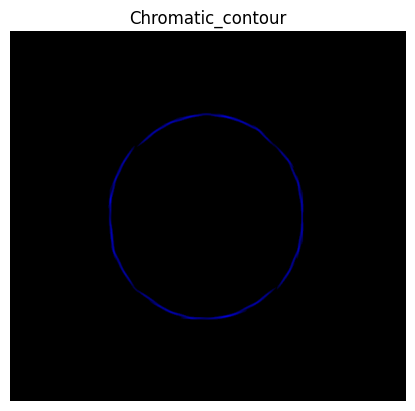

In [ ]:
# Create color contour

facilitated_image_red = facilitated_image_red.astype(np.uint8)
facilitated_image_green = facilitated_image_green.astype(np.uint8)
facilitated_image_blue = facilitated_image_blue.astype(np.uint8)

color_contour = cv2.merge([facilitated_image_red, facilitated_image_green, facilitated_image_blue])

height, width = facilitated_image_blue.shape
color_contour = np.zeros((height, width, 3), dtype=np.uint8)

color_contour[..., 0] = (R_value/255) * facilitated_image_red
color_contour[..., 1] = (G_value/255) * facilitated_image_green
color_contour[..., 2] = (B_value/255) * facilitated_image_blue

plt.imshow(color_contour)
plt.title('Chromatic_contour')
plt.axis('off')
plt.show()

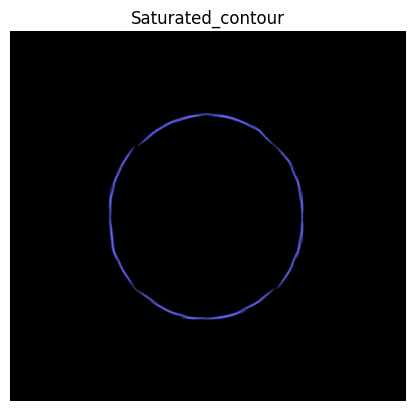

In [ ]:
# Change the saturation of the color:

def enhance_saturation(image, channel, increase_factor_sat = 0.6, increase_factor_val=1.5):  # Channel must be 0 (H), 1 (S), or 2 (V)

    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * increase_factor_sat, 0, 255)
    hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * increase_factor_val, 0, 255)

    # Convert back to RGB
    result_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

    return result_image

Saturated_contour = enhance_saturation(color_contour, 2)
plt.imshow(Saturated_contour)
plt.title('Saturated_contour')
plt.axis('off')
plt.show()

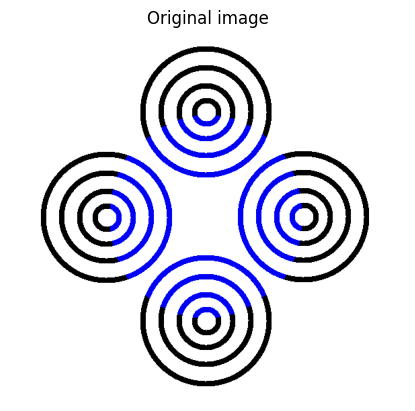

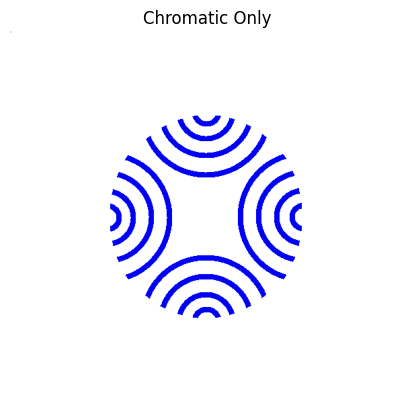

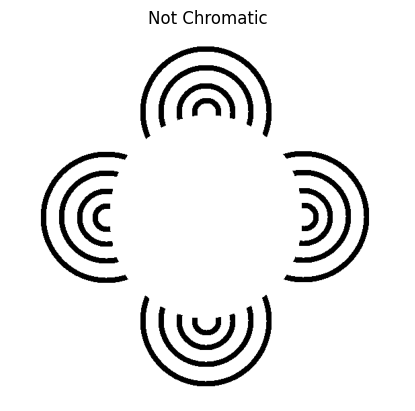

In [ ]:
# Upload image

bgr_image = cv2.imread('NeonColorBlue.png')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image, cmap='gray')
plt.axis('off')
plt.title('Original image')
plt.show()
rgb_image[1,1] = [0, 0, 255]

height, width = rgb_image.shape[:2]
for i in range(height):
  for j in range(width):
    if not np.array_equal(rgb_image[i, j], [255, 255, 255]) and not np.array_equal(rgb_image[i, j], [0, 0, 0]):
      y = i
      x = j
      break

y_chrom = y
x_chrom = x

y_background = 0
x_background = 0

# Create a mask for chromatic areas (non-white and non-black pixels):
black_threshold = np.array([0, 0, 0])

# Create a mask for not chromatic and chromatic pixels:
mask_not_chromatic = rgb_image == black_threshold
mask_not_chromatic = mask_not_chromatic.all(axis=-1)
mask_chromatic = rgb_image > black_threshold
mask_chromatic = mask_chromatic.any(axis=-1)  # Combine channels

# Create a new image with a white background:
chromatic_only = np.ones_like(rgb_image) * 255
not_chromatic_only = np.ones_like(rgb_image) * 255

# Copy the chromatic areas to the result image
chromatic_only[mask_chromatic] = rgb_image[mask_chromatic]
not_chromatic_only[mask_not_chromatic] = rgb_image[mask_not_chromatic]

plt.imshow(chromatic_only)
plt.title('Chromatic Only')
plt.axis('off')
plt.show()
plt.imshow(not_chromatic_only)
plt.title('Not Chromatic')
plt.axis('off')
plt.show()

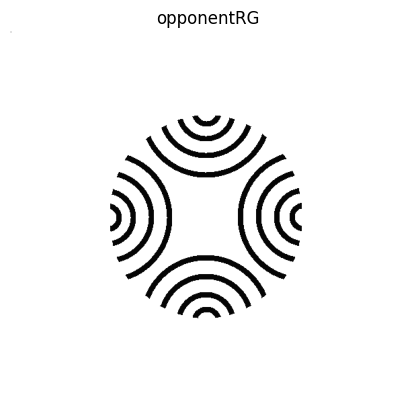

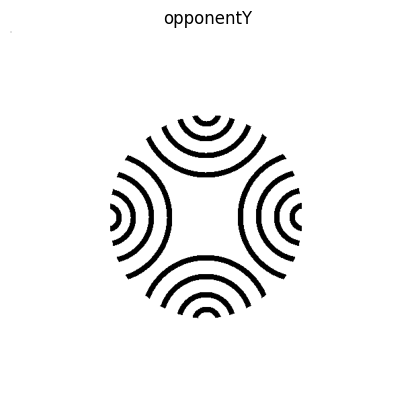

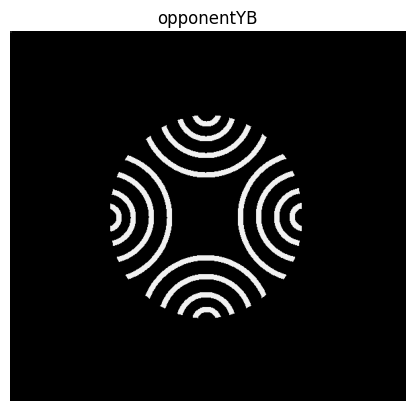

In [ ]:
# Defining the new color channels

red_channel, green_channel, blue_channel = cv2.split(chromatic_only)

opponentRG_channel = -0.0971*red_channel + 0.1458*green_channel - 0.0250*blue_channel
opponentY_channel = 0.2814*red_channel + 0.6938*green_channel + 0.0638*blue_channel
opponentYB_channel = -0.0930*red_channel -0.2529*green_channel + 0.4665*blue_channel

plt.imshow(opponentRG_channel, cmap='gray')
plt.title('opponentRG')
plt.axis('off')
plt.show()
plt.imshow(opponentY_channel, cmap='gray')
plt.title('opponentY')
plt.axis('off')
plt.show()
plt.imshow(opponentYB_channel, cmap='gray')
plt.title('opponentYB')
plt.axis('off')
plt.show()

RG_chrom = opponentRG_channel[y_chrom, x_chrom]
Y_chrom = opponentY_channel[y_chrom, x_chrom]
BY_chrom = opponentYB_channel[y_chrom, x_chrom]

RG_background = opponentRG_channel[y_background, x_background]
Y_background = opponentY_channel[y_background, x_background]
BY_background = opponentYB_channel[y_background, x_background]

In [ ]:
# Defining approximated Gabor filters

G_odd_x = np.array([[-1,1]])
G_odd_y = np.array([[-1],[1]])

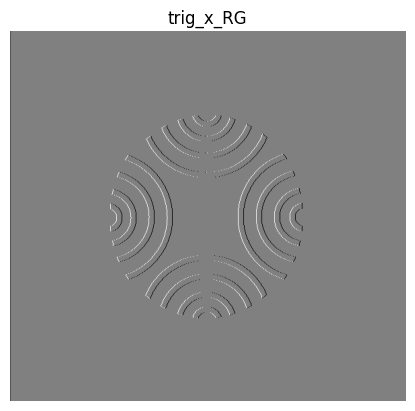

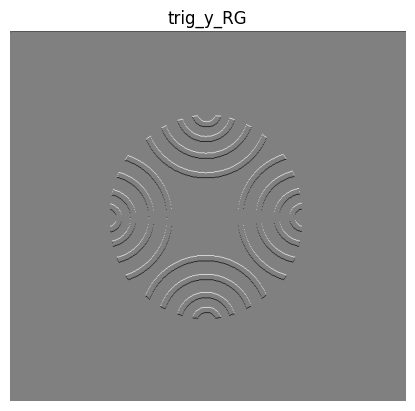

In [ ]:
# Trigger - RG channel

ODO_x_RG = scipy.signal.convolve2d(opponentRG_channel, G_odd_x, mode='same')
trig_x_RG = ODO_x_RG
plt.imshow(trig_x_RG, cmap = 'gray')
plt.axis('off')
plt.title('trig_x_RG')
plt.show()

ODO_y_RG = scipy.signal.convolve2d(opponentRG_channel, G_odd_y, mode='same')
trig_y_RG = ODO_y_RG
plt.imshow(trig_y_RG, cmap = 'gray')
plt.axis('off')
plt.title('trig_y_RG')
plt.show()

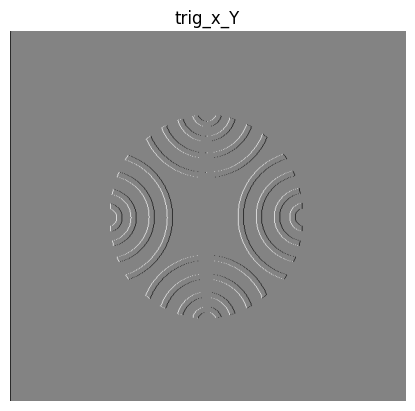

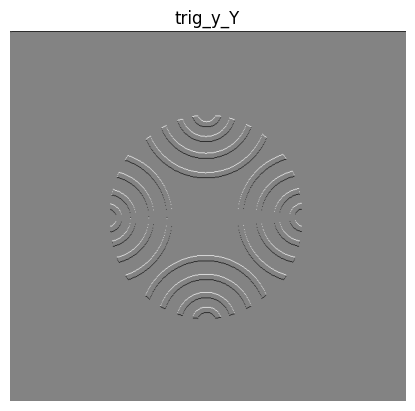

In [ ]:
# Trigger - Y channel

ODO_x_Y = scipy.signal.convolve2d(opponentY_channel, G_odd_x, mode='same')
trig_x_Y = ODO_x_Y
plt.imshow(trig_x_Y, cmap = 'gray')
plt.axis('off')
plt.title('trig_x_Y')
plt.show()

ODO_y_Y = scipy.signal.convolve2d(opponentY_channel, G_odd_y, mode='same')
trig_y_Y = ODO_y_Y
plt.imshow(trig_y_Y, cmap = 'gray')
plt.axis('off')
plt.title('trig_y_Y')
plt.show()

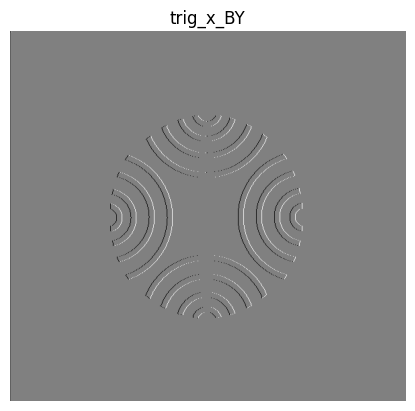

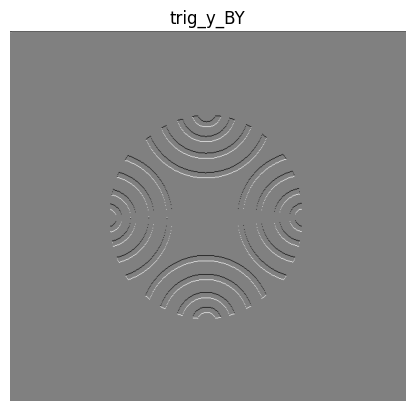

In [ ]:
# Trigger - BY channel

ODO_x_BY = scipy.signal.convolve2d(opponentYB_channel, G_odd_x, mode='same')
trig_x_BY = ODO_x_BY
plt.imshow(trig_x_BY, cmap = 'gray')
plt.axis('off')
plt.title('trig_x_BY')
plt.show()

ODO_y_BY = scipy.signal.convolve2d(opponentYB_channel, G_odd_y, mode='same')
trig_y_BY = ODO_y_BY
plt.imshow(trig_y_BY, cmap = 'gray')
plt.axis('off')
plt.title('trig_y_BY')
plt.show()

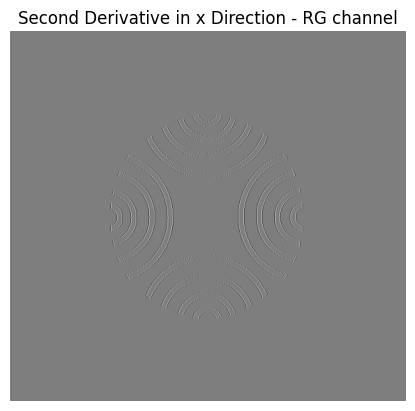

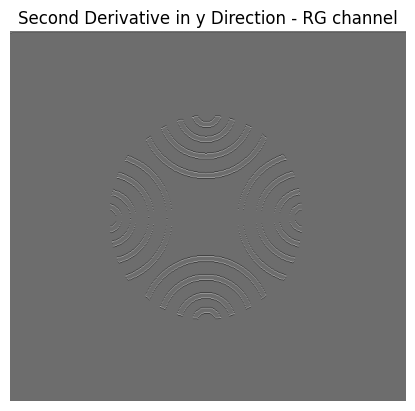

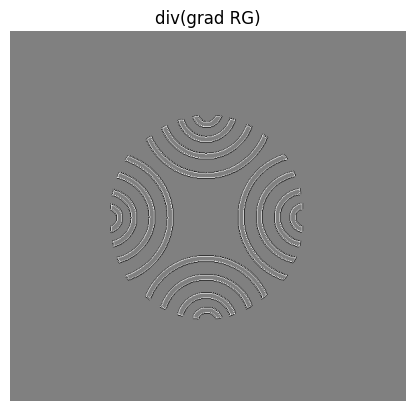

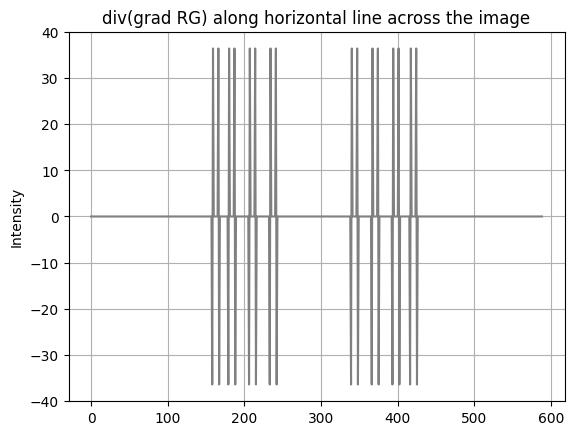

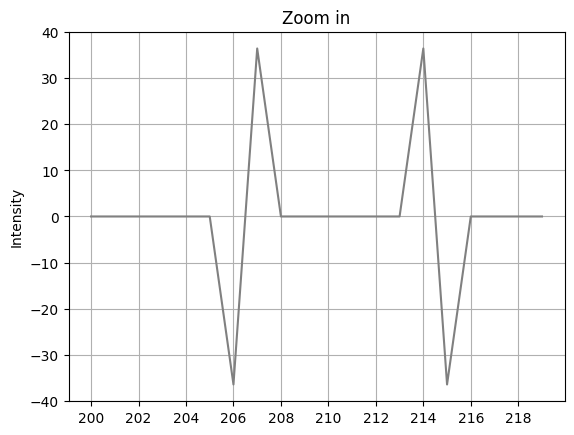

In [ ]:
# Divergence of the trigger - RG

Second_Derivative_x_RG = scipy.signal.convolve2d(trig_x_RG, G_odd_x, mode='same')
plt.imshow(Second_Derivative_x_RG, cmap = 'gray')
plt.axis('off')
plt.title('Second Derivative in x Direction - RG channel')
plt.show()

Second_Derivative_y_RG = scipy.signal.convolve2d(trig_y_RG, G_odd_y, mode='same')
plt.imshow(Second_Derivative_y_RG, cmap = 'gray')
plt.axis('off')
plt.title('Second Derivative in y Direction - RG channel')
plt.show()

Div_of_Trig_RG = Second_Derivative_x_RG + Second_Derivative_y_RG

Div_of_Trig_RG[:, 0] = 0
Div_of_Trig_RG[:, -1] = 0
Div_of_Trig_RG[0, :] = 0
Div_of_Trig_RG[-1, :] = 0

Div_of_Trig_RG[:, 1] = 0
Div_of_Trig_RG[:, -2] = 0
Div_of_Trig_RG[1, :] = 0
Div_of_Trig_RG[-2, :] = 0

div_max = np.max(Div_of_Trig_RG)
div_min = np.min(Div_of_Trig_RG)

height, width = Div_of_Trig_RG.shape

for i in range(height):
  for j in range(width):
    if Div_of_Trig_RG[i, j] > 0:
      Div_of_Trig_RG[i, j] = div_max
    if Div_of_Trig_RG[i, j] < 0:
      Div_of_Trig_RG[i, j] = div_min

plt.imshow(Div_of_Trig_RG, cmap = 'gray')
plt.title('div(grad RG)')
plt.axis('off')
plt.show()

height, width = Div_of_Trig_RG.shape

center_y = height // 2
line_values = Div_of_Trig_RG[center_y, :]
plt.plot(line_values, color='gray')
plt.title('div(grad RG) along horizontal line across the image')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.show()

line_values = Div_of_Trig_RG[center_y, 200:220]
plt.plot(range(200, 220), line_values, color='gray')
plt.title('Zoom in')
plt.xlabel('')
plt.ylabel('Intensity')
plt.xticks(range(200, 220, 2))
plt.grid()
plt.show()

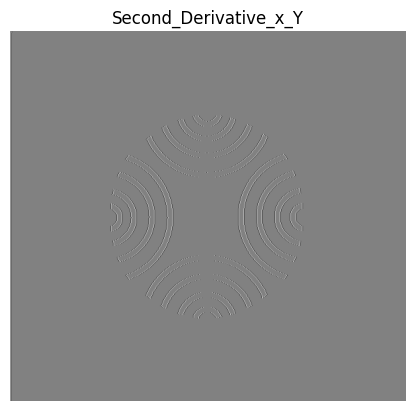

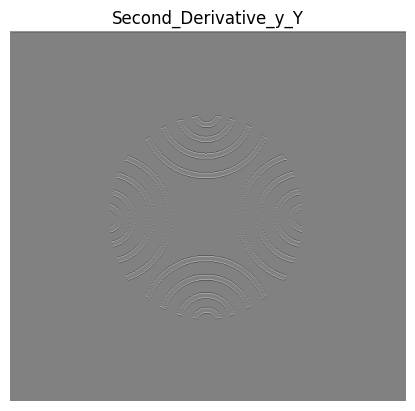

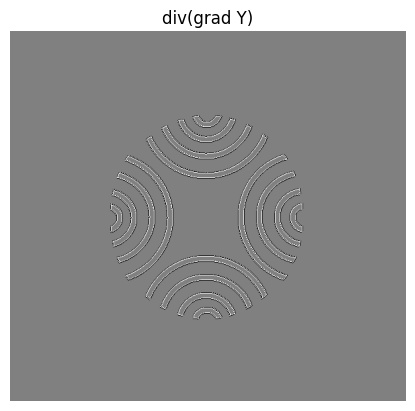

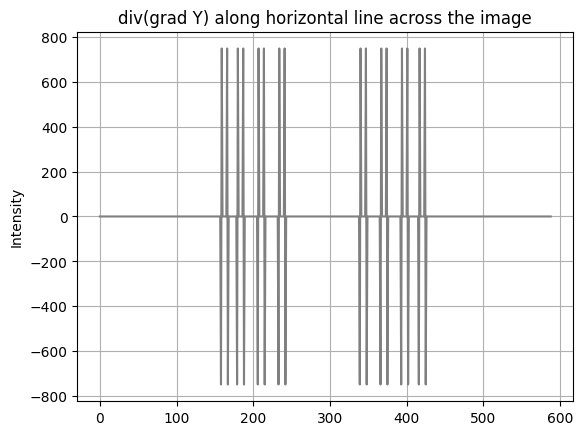

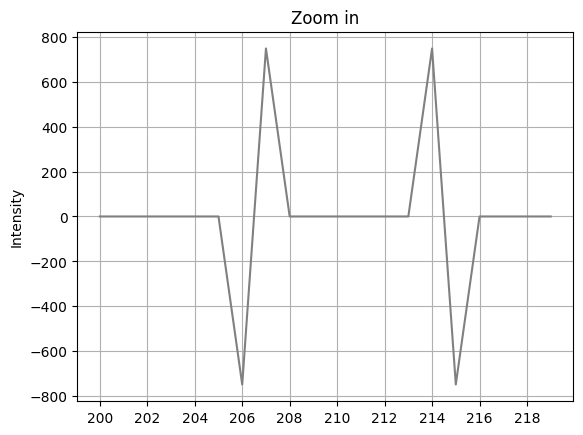

In [ ]:
# Divergence of gradient - Y

Second_Derivative_x_Y = scipy.signal.convolve2d(trig_x_Y, G_odd_x, mode='same')
plt.imshow(Second_Derivative_x_Y, cmap = 'gray')
plt.axis('off')
plt.title('Second_Derivative_x_Y')
plt.show()

Second_Derivative_y_Y = scipy.signal.convolve2d(trig_y_Y, G_odd_y, mode='same')
plt.imshow(Second_Derivative_y_Y, cmap = 'gray')
plt.axis('off')
plt.title('Second_Derivative_y_Y')
plt.show()

Div_of_Trig_Y = Second_Derivative_x_Y + Second_Derivative_y_Y

Div_of_Trig_Y[:, 0] = 0
Div_of_Trig_Y[:, -1] = 0
Div_of_Trig_Y[0, :] = 0
Div_of_Trig_Y[-1, :] = 0

Div_of_Trig_Y[:, 1] = 0
Div_of_Trig_Y[:, -2] = 0
Div_of_Trig_Y[1, :] = 0
Div_of_Trig_Y[-2, :] = 0

div_max = np.max(Div_of_Trig_Y)
div_min = np.min(Div_of_Trig_Y)

height, width = Div_of_Trig_Y.shape

for i in range(height):
  for j in range(width):
    if Div_of_Trig_Y[i, j] > 0:
      Div_of_Trig_Y[i, j] = div_max
    if Div_of_Trig_Y[i, j] < 0:
      Div_of_Trig_Y[i, j] = div_min

plt.imshow(Div_of_Trig_Y, cmap = 'gray')
plt.title('div(grad Y)')
plt.axis('off')
plt.show()

height, width = Div_of_Trig_Y.shape

center_y = height // 2

line_values = Div_of_Trig_Y[center_y, :]
plt.plot(line_values, color='gray')
plt.title('div(grad Y) along horizontal line across the image')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.show()

line_values = Div_of_Trig_Y[center_y, 200:220]
plt.plot(range(200, 220), line_values, color='gray')
plt.title('Zoom in')
plt.xlabel('')
plt.ylabel('Intensity')
plt.xticks(range(200, 220, 2))
plt.grid()
plt.show()

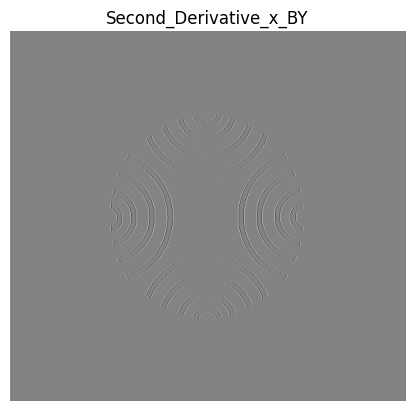

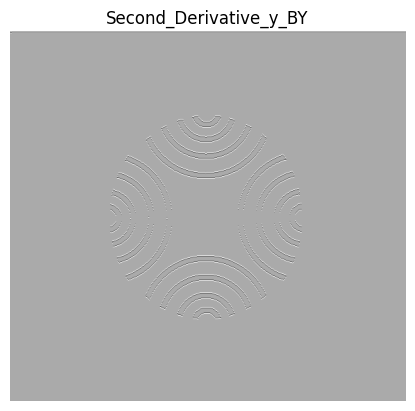

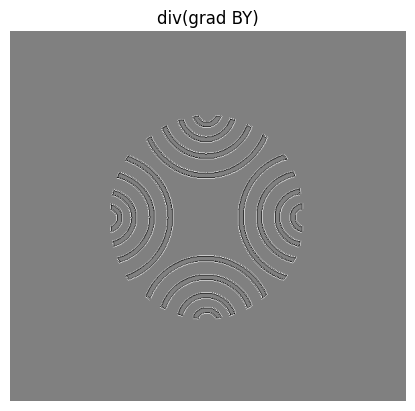

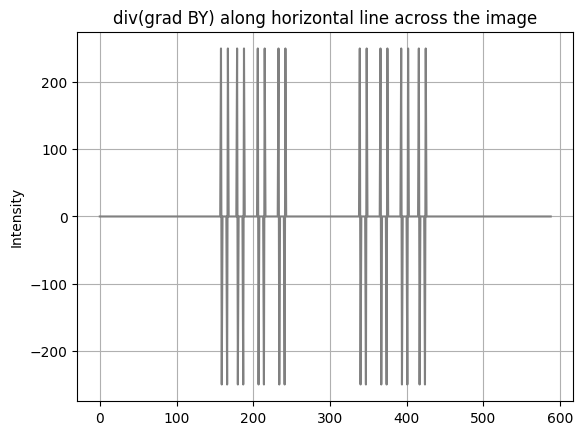

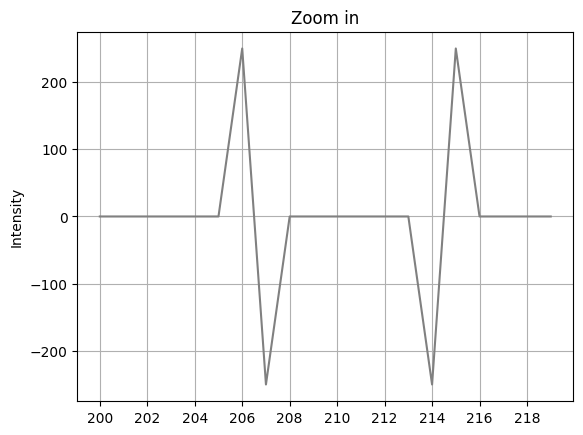

In [ ]:
# Divergence of gradient - BY

Second_Derivative_x_BY = scipy.signal.convolve2d(trig_x_BY, G_odd_x, mode='same')
plt.imshow(Second_Derivative_x_BY, cmap = 'gray')
plt.axis('off')
plt.title('Second_Derivative_x_BY')
plt.show()

Second_Derivative_y_BY = scipy.signal.convolve2d(trig_y_BY, G_odd_y, mode='same')
plt.imshow(Second_Derivative_y_BY, cmap = 'gray')
plt.axis('off')
plt.title('Second_Derivative_y_BY')
plt.show()

Div_of_Trig_BY = Second_Derivative_x_BY + Second_Derivative_y_BY

Div_of_Trig_BY[:, 0] = 0
Div_of_Trig_BY[:, -1] = 0
Div_of_Trig_BY[0, :] = 0
Div_of_Trig_BY[-1, :] = 0

Div_of_Trig_BY[:, 1] = 0
Div_of_Trig_BY[:, -2] = 0
Div_of_Trig_BY[1, :] = 0
Div_of_Trig_BY[-2, :] = 0

div_max = np.max(Div_of_Trig_BY)
div_min = np.min(Div_of_Trig_BY)

height, width = Div_of_Trig_BY.shape

for i in range(height):
  for j in range(width):
    if Div_of_Trig_BY[i, j] > 0:
      Div_of_Trig_BY[i, j] = div_max
    if Div_of_Trig_BY[i, j] < 0:
      Div_of_Trig_BY[i, j] = div_min

plt.imshow(Div_of_Trig_BY, cmap = 'gray')
plt.title('div(grad BY)')
plt.axis('off')
plt.show()

height, width = Div_of_Trig_BY.shape

center_y = height // 2

line_values = Div_of_Trig_BY[center_y, :]
plt.plot(line_values, color='gray')
plt.title('div(grad BY) along horizontal line across the image')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.show()

line_values = Div_of_Trig_BY[center_y, 200:220]
plt.plot(range(200, 220), line_values, color='gray')
plt.title('Zoom in')
plt.xlabel('')
plt.ylabel('Intensity')
plt.xticks(range(200, 220, 2))
plt.grid()
plt.show()

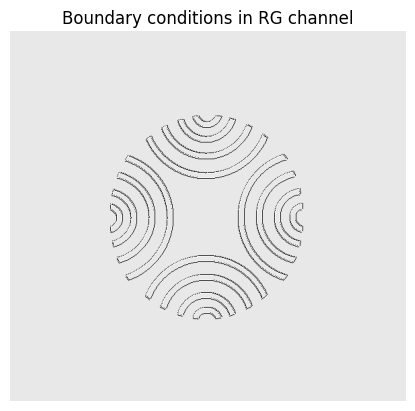

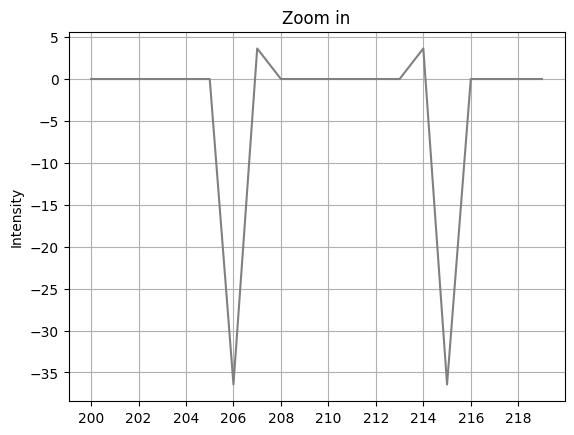

In [ ]:
# Defining the boundary conditions for RG channel

height, width = Div_of_Trig_RG.shape

if RG_chrom >= RG_background:
  D_plus_RG = 1
  D_minus_RG = 0.1
else:
  D_plus_RG = 0.1
  D_minus_RG = 1

for i in range(height):
  for j in range(width):
    if Div_of_Trig_RG[i, j] > 0:
      Div_of_Trig_RG[i, j] = D_plus_RG * Div_of_Trig_RG[i, j]
    if Div_of_Trig_RG[i, j] < 0:
      Div_of_Trig_RG[i, j] = D_minus_RG * Div_of_Trig_RG[i, j]

Boundary_RG = Div_of_Trig_RG

plt.imshow(Boundary_RG, cmap = 'gray')
plt.title('Boundary conditions in RG channel')
plt.axis('off')
plt.show()

height, width = Boundary_RG.shape

center_y = height // 2

line_values = Boundary_RG[center_y, 200:220]
plt.plot(range(200, 220), line_values, color='gray')
plt.title('Zoom in')
plt.xlabel('')
plt.ylabel('Intensity')
plt.xticks(range(200, 220, 2))
plt.grid()
plt.show()

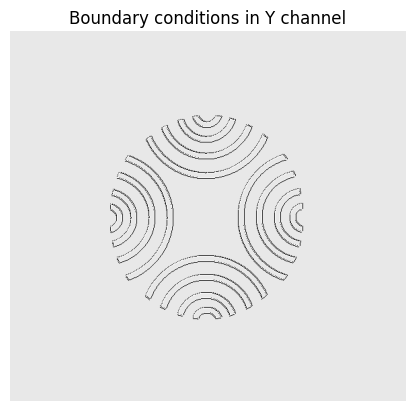

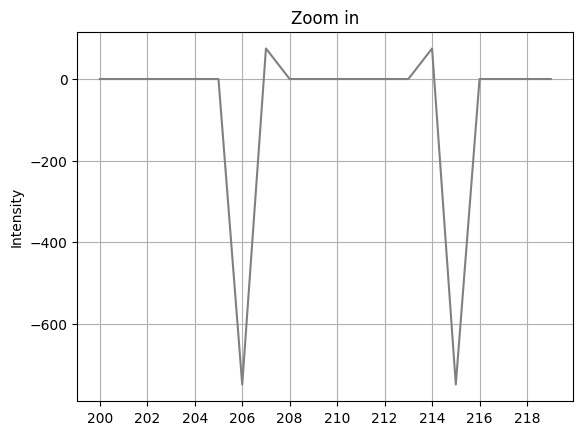

In [ ]:
# Defining the boundary conditions for Y channel

height, width = Div_of_Trig_Y.shape

if Y_chrom >= Y_background:
  D_plus_Y = 1
  D_minus_Y = 0.1
else:
  D_plus_Y = 0.1
  D_minus_Y = 1

for i in range(height):
  for j in range(width):
    if Div_of_Trig_Y[i, j] > 0:
      Div_of_Trig_Y[i, j] = D_plus_Y * Div_of_Trig_Y[i, j]
    if Div_of_Trig_Y[i, j] < 0:
      Div_of_Trig_Y[i, j] = D_minus_Y * Div_of_Trig_Y[i, j]

Boundary_Y = Div_of_Trig_Y

plt.imshow(Boundary_Y, cmap = 'gray')
plt.title('Boundary conditions in Y channel')
plt.axis('off')
plt.show()

height, width = Boundary_Y.shape

center_y = height // 2

line_values = Boundary_Y[center_y, 200:220]
plt.plot(range(200, 220), line_values, color='gray')
plt.title('Zoom in')
plt.xlabel('')
plt.ylabel('Intensity')
plt.xticks(range(200, 220, 2))
plt.grid()
plt.show()

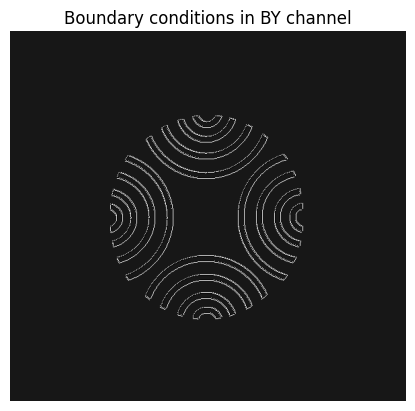

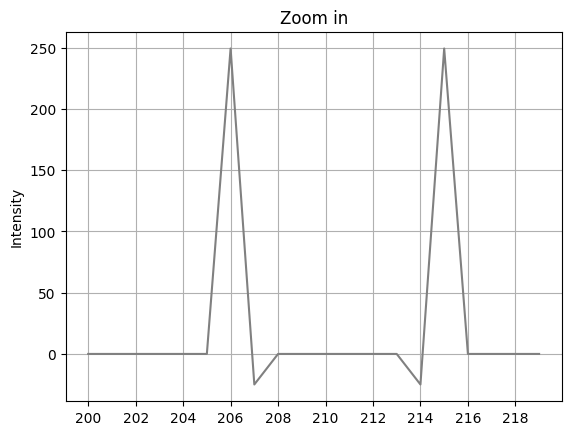

In [ ]:
# Defining the boundary conditions for BY channel

height, width = Div_of_Trig_BY.shape

if BY_chrom >= BY_background:
  D_plus_BY = 1
  D_minus_BY = 0.1
else:
  D_plus_BY = 0.1
  D_minus_BY = 1

for i in range(height):
  for j in range(width):
    if Div_of_Trig_BY[i, j] > 0:
      Div_of_Trig_BY[i, j] = D_plus_BY * Div_of_Trig_BY[i, j]
    if Div_of_Trig_BY[i, j] < 0:
      Div_of_Trig_BY[i, j] = D_minus_BY * Div_of_Trig_BY[i, j]

Boundary_BY = Div_of_Trig_BY

plt.imshow(Boundary_BY, cmap = 'gray')
plt.title('Boundary conditions in BY channel')
plt.axis('off')
plt.show()

height, width = Boundary_BY.shape

center_y = height // 2

line_values = Boundary_BY[center_y, 200:220]
plt.plot(range(200, 220), line_values, color='gray')
plt.title('Zoom in')
plt.xlabel('')
plt.ylabel('Intensity')
plt.xticks(range(200, 220, 2))
plt.grid()
plt.show()

In [ ]:
# Solving Laplace equation in RG channel: Δ(I_diffused_RG) = 0

height, width = opponentRG_channel.shape

def solve_Laplace_equation(width, height, iterations=1000, tol=1e-3):

    # Initialize the grid:
    u = np.zeros((height, width))
    u_new = np.zeros((height, width))

    # Perform Jacobi iterations
    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if Boundary_RG[i, j] == 0:
                    u_new[i, j] = 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1])
                else:
                    u_new[i, j] = Boundary_RG[i, j]
                if facilitated_image_blue[i, j] != 0:
                    u_new[i, j] = 0

        # Check for convergence
        if np.max(np.abs(u_new - u)) < tol:
            break

        # Update solution
        u[:] = u_new

    return u

delta_I_RG = solve_Laplace_equation(width, height)

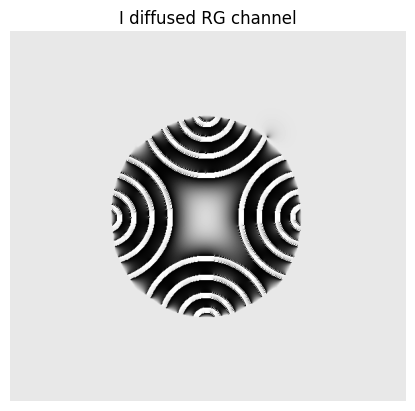

In [ ]:
plt.imshow(delta_I_RG, cmap = 'gray')
plt.title('I diffused RG channel')
plt.axis('off')
plt.show()

In [ ]:
# Solving Laplace equation in Y channel: Δ(I_diffused_Y) = 0

height, width = opponentY_channel.shape

def solve_Laplace_equation(width, height, iterations=1000, tol=1e-3):

    # Initialize the grid:
    u = np.zeros((height, width))
    u_new = np.zeros((height, width))

    # Perform Jacobi iterations
    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if Boundary_Y[i, j] == 0:
                    u_new[i, j] = 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1])
                else:
                    u_new[i, j] = Boundary_Y[i, j]
                if facilitated_image_blue[i, j] != 0:
                    u_new[i, j] = 0

        # Check for convergence
        if np.max(np.abs(u_new - u)) < tol:
            break

        # Update solution
        u[:] = u_new

    return u

delta_I_Y = solve_Laplace_equation(width, height)

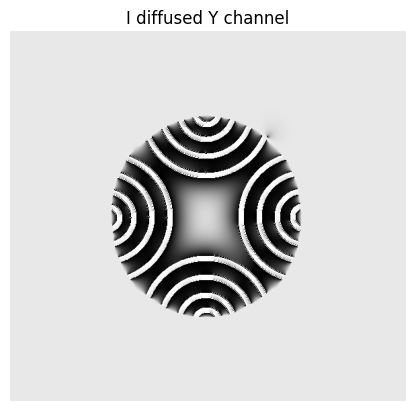

In [ ]:
plt.imshow(delta_I_Y, cmap = 'gray')
plt.title('I diffused Y channel')
plt.axis('off')
plt.show()

In [ ]:
# Solving Laplace equation in BY channel: Δ(I_diffused_BY) = 0

height, width = opponentYB_channel.shape

def solve_Laplace_equation(width, height, iterations=1000, tol=1e-3):

    # Initialize the grid:
    u = np.zeros((height, width))
    u_new = np.zeros((height, width))

    # Perform Jacobi iterations
    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if Boundary_BY[i, j] == 0:
                    u_new[i, j] = 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1])
                else:
                    u_new[i, j] = Boundary_BY[i, j]
                if facilitated_image_blue[i, j] != 0:
                    u_new[i, j] = 0

        # Check for convergence
        if np.max(np.abs(u_new - u)) < tol:
            break

        # Update solution
        u[:] = u_new

    return u

delta_I_BY = solve_Laplace_equation(width, height)

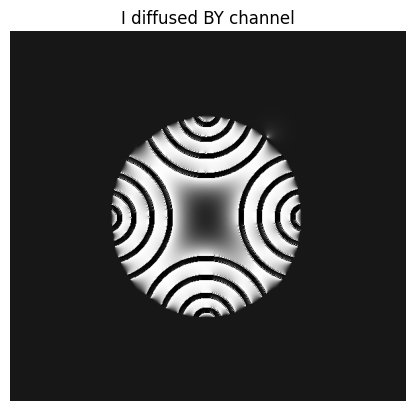

In [ ]:
plt.imshow(delta_I_BY, cmap = 'gray')
plt.title('I diffused BY channel')
plt.axis('off')
plt.show()

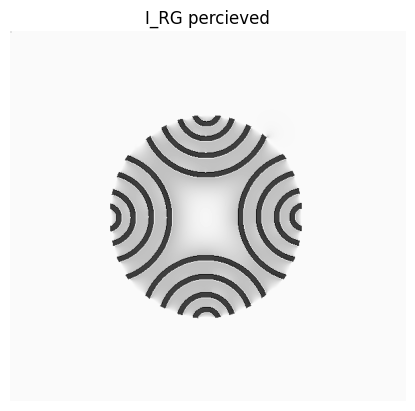

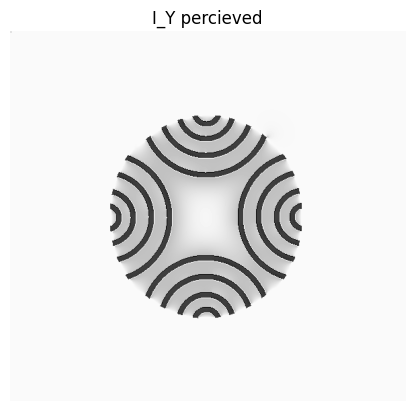

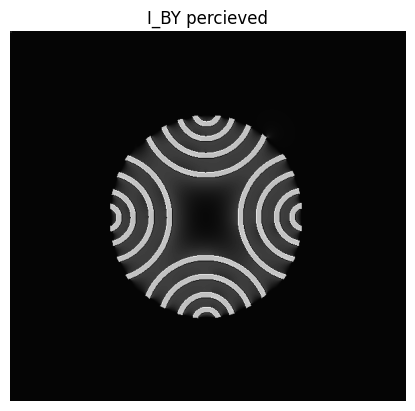

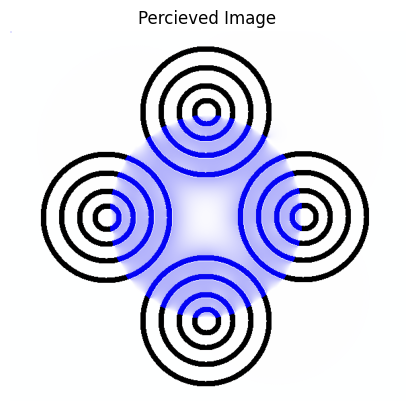

In [ ]:
# Combining for each channel the original image and I_diffused

alpha = 0.1

I_RG = opponentRG_channel + alpha * delta_I_RG
I_Y = opponentY_channel + alpha * delta_I_Y
I_BY = opponentYB_channel + alpha * delta_I_BY

plt.imshow(I_RG , cmap = 'gray')
plt.title('I_RG percieved')
plt.axis('off')
plt.show()
plt.imshow(I_Y , cmap = 'gray')
plt.title('I_Y percieved')
plt.axis('off')
plt.show()
plt.imshow(I_BY , cmap = 'gray')
plt.title('I_BY percieved')
plt.axis('off')
plt.show()

# Inverse transformation:
R_channel = (-6.4315076506366820439)*I_RG + 1.1677127390847542369*I_Y - 0.50436819725514334708*I_BY
G_channel = 2.5970087130385898641*I_RG + 0.90137958831127302493*I_Y + 0.015899678653173692632*I_BY
B_channel = 0.12573052951392914592*I_RG + 0.72144948042615882536*I_Y + 2.0516930040442857355*I_BY

Percieved_Image = (cv2.merge([R_channel, G_channel, B_channel]))/255
Percieved_Image = np.clip(Percieved_Image, 0, 1)

height, width = opponentYB_channel.shape
for i in range(height):
  for j in range(width):
    if not_chromatic_only[i, j][0] == 0 and not_chromatic_only[i, j][1] == 0 and not_chromatic_only[i, j][2] == 0:
      Percieved_Image[i, j] = not_chromatic_only[i, j]

plt.imshow(Percieved_Image , cmap = 'gray')
plt.title('Percieved Image')
plt.axis('off')
plt.show()

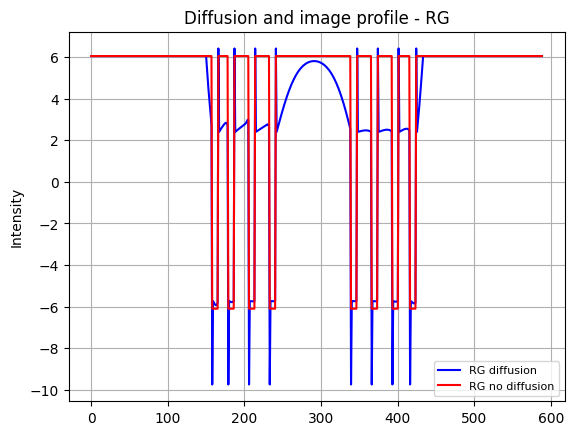

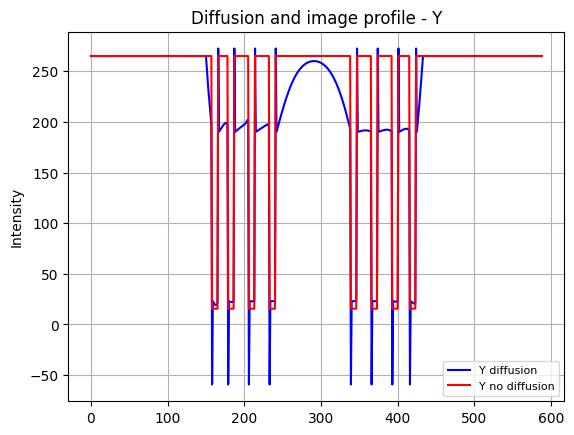

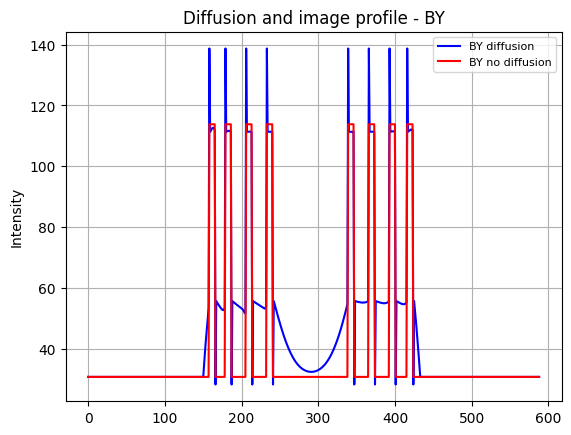

In [ ]:
# Side profile of RG diffusion

height, width = I_RG.shape

center_y = height // 2
center_x = width // 2

line_values_diff = I_RG[center_y, :]
line_values_RG = opponentRG_channel[center_y, :]

plt.plot(line_values_diff, label='RG diffusion', color='blue')
plt.plot(line_values_RG, label='RG no diffusion', color='red')
plt.title('Diffusion and image profile - RG')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.legend(loc='lower right', prop={'size': 8})
plt.show()

# Side profile of Y diffusion

line_values_diff = I_Y[center_y, :]
line_values_Y = opponentY_channel[center_y, :]

plt.plot(line_values_diff, label='Y diffusion', color='blue')
plt.plot(line_values_Y, label='Y no diffusion', color='red')
plt.title('Diffusion and image profile - Y')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.legend(loc='lower right', prop={'size': 8})
plt.show()

# Side profile of BY diffusion

line_values_diff = I_BY[center_y, :]
line_values_BY = opponentYB_channel[center_y, :]

plt.plot(line_values_diff, label='BY diffusion', color='blue')
plt.plot(line_values_BY, label='BY no diffusion', color='red')
plt.title('Diffusion and image profile - BY')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()

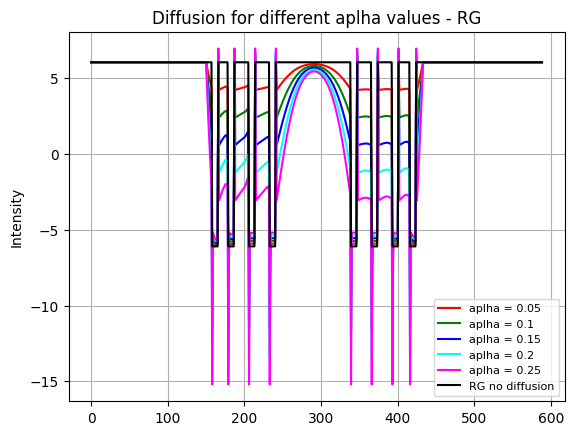

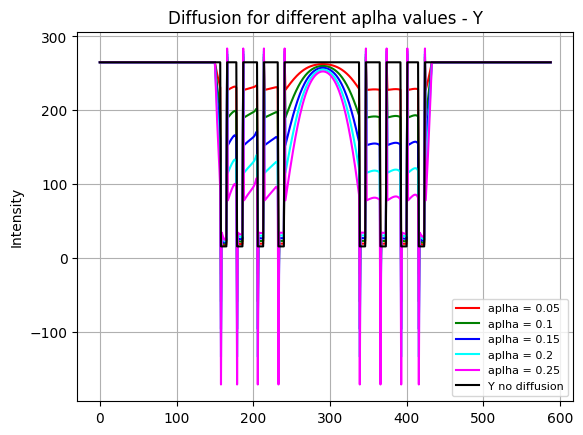

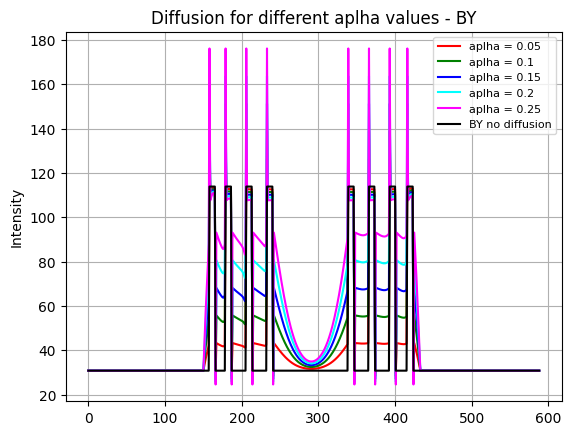

In [ ]:
# Changing value of alpha - RG

for alpha in [0.05, 0.1, 0.15, 0.2, 0.25]:
  I_RG = opponentRG_channel + alpha * delta_I_RG
  line_values_diff = I_RG[center_y, :]
  if alpha == 0.05:
    plt.plot(line_values_diff, label='aplha = 0.05', color='red')
  if alpha == 0.1:
    plt.plot(line_values_diff, label='aplha = 0.1', color='green')
  if alpha == 0.15:
    plt.plot(line_values_diff, label='aplha = 0.15', color='blue')
  if alpha == 0.2:
    plt.plot(line_values_diff, label='aplha = 0.2', color='cyan')
  if alpha == 0.25:
    plt.plot(line_values_diff, label='aplha = 0.25', color='magenta')

line_values_RG = opponentRG_channel[center_y, :]
plt.plot(line_values_RG, label='RG no diffusion', color='black')
plt.title('Diffusion for different aplha values - RG')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.legend(loc='lower right', prop={'size': 8})
plt.show()

# Changing value of alpha - Y

for alpha in [0.05, 0.1, 0.15, 0.2, 0.25]:
  I_Y = opponentY_channel + alpha * delta_I_Y
  line_values_diff = I_Y[center_y, :]
  if alpha == 0.05:
    plt.plot(line_values_diff, label='aplha = 0.05', color='red')
  if alpha == 0.1:
    plt.plot(line_values_diff, label='aplha = 0.1', color='green')
  if alpha == 0.15:
    plt.plot(line_values_diff, label='aplha = 0.15', color='blue')
  if alpha == 0.2:
    plt.plot(line_values_diff, label='aplha = 0.2', color='cyan')
  if alpha == 0.25:
    plt.plot(line_values_diff, label='aplha = 0.25', color='magenta')

line_values_Y = opponentY_channel[center_y, :]
plt.plot(line_values_Y, label='Y no diffusion', color='black')
plt.title('Diffusion for different aplha values - Y')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.legend(loc='lower right', prop={'size': 8})
plt.show()

# Changing value of alpha - BY

for alpha in [0.05, 0.1, 0.15, 0.2, 0.25]:
  I_BY = opponentYB_channel + alpha * delta_I_BY
  line_values_diff = I_BY[center_y, :]
  if alpha == 0.05:
    plt.plot(line_values_diff, label='aplha = 0.05', color='red')
  if alpha == 0.1:
    plt.plot(line_values_diff, label='aplha = 0.1', color='green')
  if alpha == 0.15:
    plt.plot(line_values_diff, label='aplha = 0.15', color='blue')
  if alpha == 0.2:
    plt.plot(line_values_diff, label='aplha = 0.2', color='cyan')
  if alpha == 0.25:
    plt.plot(line_values_diff, label='aplha = 0.25', color='magenta')

line_values_BY = opponentYB_channel[center_y, :]
plt.plot(line_values_BY, label='BY no diffusion', color='black')
plt.title('Diffusion for different aplha values - BY')
plt.xlabel('')
plt.ylabel('Intensity')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()

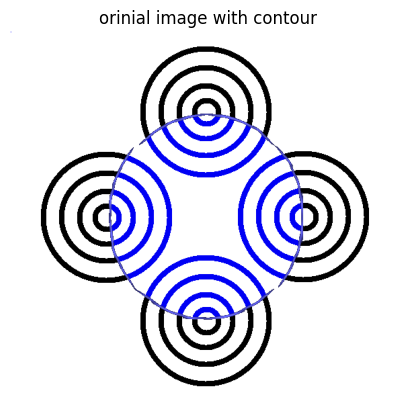

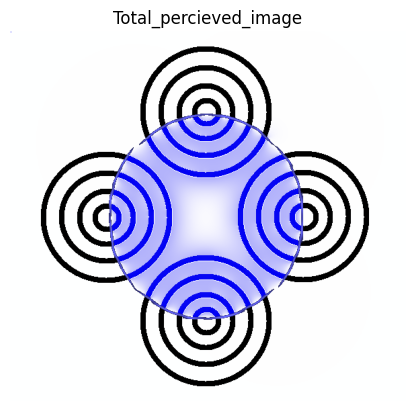

In [ ]:
# Combine the orthogonal completion image with the original image and with diffusion image

height, width = facilitated_image_blue.shape

Percieved_Image = (Percieved_Image * 255).astype(np.uint8)

for i in range(height):
  for j in range(width):
    if color_contour[i, j][dominant_channel] > 60:
      if Saturated_contour[i, j][0] != 0 or Saturated_contour[i, j][1] != 0 or Saturated_contour[i,j][2] != 0:
        rgb_image[i, j][0] = Saturated_contour[i, j][0]
        rgb_image[i, j][1] = Saturated_contour[i, j][1]
        rgb_image[i, j][2] = Saturated_contour[i, j][2]
        Percieved_Image[i, j][0] = Saturated_contour[i, j][0]
        Percieved_Image[i, j][1] = Saturated_contour[i, j][1]
        Percieved_Image[i, j][2] = Saturated_contour[i, j][2]

plt.imshow(rgb_image)
plt.title('orinial image with contour')
plt.axis('off')
plt.show()

Total_percieved_image = Percieved_Image
plt.imshow(Total_percieved_image)
plt.title('Total_percieved_image')
plt.axis('off')
plt.show()